# Problem Statement:
The images of the digits are given, ranging from 0 to 9. The objective is to build and train Convolutional Neural Network model which can  recognize these images efficiently.

## Steps:
1. Data Preparation
2. Define CNN model
3. Evaluate the model
4. Prediction

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Lambda, Flatten, Dense
from keras.utils.np_utils import to_categorical 
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


## Data Preparation

In [3]:
# Loading Train and Test Data
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [6]:
X = train.drop('label', axis=1)
y = train['label']

In [7]:
print('Shape of independent features: ', X.shape)
print('Shape of target label: ', y.shape)

Shape of independent features:  (42000, 784)
Shape of target label:  (42000,)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

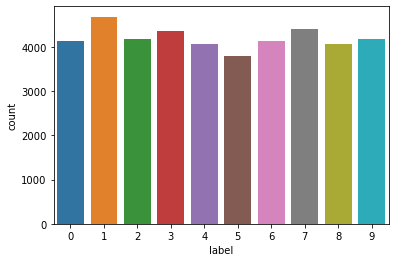

In [8]:
sns.countplot(y)
y.value_counts()

### Check Missing Values(if any)

In [9]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

Hence, there is no missing value present in the data

### Normalizing the data

In [11]:
X = X/255.0
test = test/255.0

### Reshape image into 3-dimensions (height=28px, width=28px, channels=1)

In [12]:
X = X.values.reshape(X.shape[0], 28,28,1)
test = test.values.reshape(test.shape[0], 28,28,1)

In [13]:
X.shape, test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

### One-hot-encoding

In [14]:
# Encode labels to one-hot-vectors (For ex '3' is represented as: [0,0,0,1,0,0,0,0,0,0])
y = to_categorical(y, num_classes=10)

In [15]:
# Let's look the output
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [16]:
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Note:
Be carefull with some unbalanced dataset, a simple random split could cause inaccurate evaluation during the validation. To avoid that, you could use stratify = True option in train_test_split function.

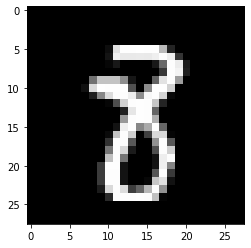

In [17]:
# Let's check one of the training image
plt.imshow(X_train[15][:,:,0], cmap='gray')

### Define the model

In [36]:
model = Sequential()

model.add(Conv2D(32, (5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (5,5),padding = 'Same', activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='Same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='Same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25)),

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [38]:
# Define Optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-8, decay=0.001)

In [39]:
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
# Set learning rate reduction
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                           factor=0.5,
                                           verbose=2,
                                           min_lr=0.00001)

### Data Augmentation
To generate more images for training the model 

In [41]:
datagen = ImageDataGenerator(rotation_range=20,
                            zoom_range=0.2,
                            height_shift_range=0.2,
                            width_shift_range=0.2,
                            horizontal_flip=False,
                            vertical_flip=False)
datagen.fit(X_train)

In [42]:
num_epoch =35
batch_size=86

In [43]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train, y_train,batch_size=batch_size),
                             epochs=num_epoch, steps_per_epoch=X_train.shape[0] // batch_size,
                             validation_data=(X_test, y_test))

Epoch 1/35
439/439 [==============================] - 13s 30ms/step - loss: 0.6991 - accuracy: 0.7734 - val_loss: 0.1391 - val_accuracy: 0.9571
Epoch 2/35
439/439 [==============================] - 12s 28ms/step - loss: 0.2152 - accuracy: 0.9349 - val_loss: 0.0549 - val_accuracy: 0.9860
Epoch 3/35
439/439 [==============================] - 12s 28ms/step - loss: 0.1443 - accuracy: 0.9561 - val_loss: 0.0471 - val_accuracy: 0.9869
Epoch 4/35
439/439 [==============================] - 12s 27ms/step - loss: 0.1237 - accuracy: 0.9630 - val_loss: 0.0360 - val_accuracy: 0.9900
Epoch 5/35
439/439 [==============================] - 12s 27ms/step - loss: 0.1035 - accuracy: 0.9687 - val_loss: 0.0373 - val_accuracy: 0.9886
Epoch 6/35
439/439 [==============================] - 13s 30ms/step - loss: 0.0975 - accuracy: 0.9705 - val_loss: 0.0311 - val_accuracy: 0.9905
Epoch 7/35
439/439 [==============================] - 12s 28ms/step - loss: 0.0883 - accuracy: 0.9729 - val_loss: 0.0285 - val_accuracy:

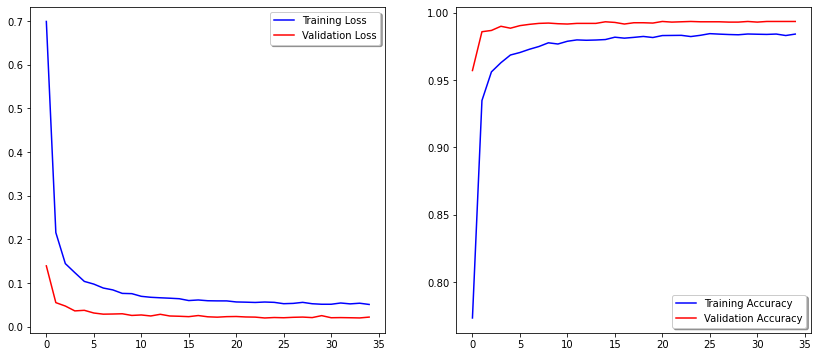

In [45]:
# Plot the loss and accuracy curves for training and validation 
plt.figure(figsize=(14,6))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

### Confusion Matrix

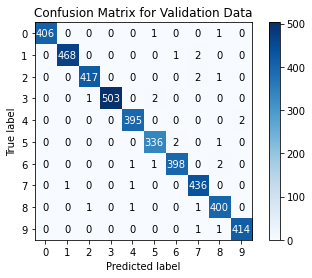

In [46]:
y_prediction = model.predict(X_test)
y_prediction = np.argmax(y_prediction, axis=1)
y_true = np.argmax(y_test, axis=1)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_true, y_prediction, title='Confusion Matrix for Validation Data')

## Predict the result

In [47]:
pred = model.predict(test)
pred

array([[6.1083033e-10, 1.1389620e-11, 9.9999988e-01, ..., 1.0968282e-07,
        3.0013599e-08, 4.3271604e-09],
       [9.9989915e-01, 4.5633470e-09, 8.4844496e-06, ..., 2.8582363e-07,
        9.3898816e-06, 6.7964640e-05],
       [9.8697699e-09, 4.7644887e-12, 4.2056277e-07, ..., 9.9017349e-08,
        8.2316474e-06, 9.9998951e-01],
       ...,
       [3.1485760e-14, 6.7057166e-14, 2.5194161e-10, ..., 5.8378350e-12,
        4.0257582e-08, 5.3120297e-10],
       [8.4073989e-08, 2.1365649e-11, 1.3814818e-07, ..., 1.9934675e-06,
        8.3199430e-09, 9.9999630e-01],
       [6.4525496e-11, 9.3671180e-15, 1.0000000e+00, ..., 7.0941547e-10,
        3.0214053e-08, 2.2132307e-10]], dtype=float32)

In [48]:
# select the index with the maximum probability
prediction = np.argmax(pred, axis = 1)
prediction

array([2, 0, 9, ..., 3, 9, 2])

In [49]:
prediction = pd.Series(data=prediction, name='Label')

In [50]:
# Save predictions
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),prediction],axis = 1)

submission.to_csv("Digit_Recognizer_submission09.csv",index=False)